In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000,high=180.00, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(27.438591591362908, -74.1821133339263),
 (37.826954172582404, -94.29490987138607),
 (46.48720683718378, 77.3519537373245),
 (-40.91988115213945, -10.37316830446241),
 (2.8015467209425964, 125.97652737334101),
 (53.92678125724956, 104.48126408465794),
 (-28.463151890961925, -155.29608128175033),
 (6.797847477973875, -52.873996708478685),
 (-17.770650691234223, -27.982604348449854),
 (-5.257294443826126, 40.48983036386869),
 (-16.062809679654194, -150.30707313757608),
 (58.18721743441304, 69.64034763244283),
 (-42.277735572865545, -77.21834103135978),
 (15.500836804270378, -5.77771910439256),
 (14.95473133225083, -9.290547333187249),
 (-13.361084098748819, 142.7938534207259),
 (-17.595826851273316, 125.84658783805571),
 (15.149672132654501, -150.9713402486131),
 (-2.0006202334153187, 155.39609724816614),
 (78.21285009994409, 48.26905291628887),
 (-39.664318373819526, 104.60680698794101),
 (-19.789119154888184, 147.49899114068018),
 (30.023171158959386, 179.7611739493077),
 (44.38980425

You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(cities)
len(cities)

['marsh harbour', 'pittsburg', 'ushtobe', 'jamestown', 'bitung', 'osa', 'avera', 'iracoubo', 'belmonte', 'micheweni', 'fare', 'vagay', 'castro', 'sokolo', 'nioro', 'daru', 'kununurra', 'hilo', 'namatanai', 'belushya guba', 'busselton', 'ayr', 'butaritari', 'powell', 'vaini', 'rio gallegos', 'ushuaia', 'odweyne', 'rikitea', 'cidreira', 'hermanus', 'twentynine palms', 'mataura', 'merritt', 'bethel', 'new norfolk', 'lluta', 'katsuura', 'illoqqortoormiut', 'mar del plata', 'mogadishu', 'port alfred', 'jurm', 'wilmington', 'saskylakh', 'zyryanka', 'kavieng', 'dikson', 'hasaki', 'atuona', 'jambi', 'waddan', 'salym', 'victoria', 'taolanaro', 'bathsheba', 'mys shmidta', 'port elizabeth', 'kapaa', 'kavaratti', 'geraldton', 'falealupo', 'acapulco', 'hithadhoo', 'lichinga', 'punta arenas', 'mayumba', 'ulluaya', 'khatanga', 'clonakilty', 'mandalgovi', 'beckley', 'pevek', 'carnarvon', 'los algarrobos', 'albany', 'amderma', 'mackay', 'flinders', 'rawson', 'hollins', 'tuktoyaktuk', 'makungu', 'faanui

633

# Get the City Weather Data


## Import Dependencies, and Initialize an Empty List and Counters

In [5]:
import requests
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsh harbour
Processing Record 2 of Set 1 | pittsburg
Processing Record 3 of Set 1 | ushtobe
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bitung
Processing Record 6 of Set 1 | osa
Processing Record 7 of Set 1 | avera
Processing Record 8 of Set 1 | iracoubo
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | micheweni
Processing Record 11 of Set 1 | fare
Processing Record 12 of Set 1 | vagay
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | sokolo
Processing Record 15 of Set 1 | nioro
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | namatanai
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ayr
Processing Record 23 of Set 1 | butaritar

Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | jardim
Processing Record 44 of Set 4 | tarko-sale
Processing Record 45 of Set 4 | derzhavinsk
Processing Record 46 of Set 4 | tilichiki
Processing Record 47 of Set 4 | inhambane
Processing Record 48 of Set 4 | inongo
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | hulan ergi
Processing Record 1 of Set 5 | alibag
Processing Record 2 of Set 5 | chumikan
Processing Record 3 of Set 5 | tabou
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 8 of Set 5 | sala
Processing Record 9 of Set 5 | chalon-sur-saone
Processing Record 10 of Set 5 | high rock
Processing Record 11 of Set 5 | liverpool
Processing Record 12 of Set 5 | iqaluit
Processing Record 13 of Set 5 | tessalit
Processing Record 14 of Set 5 | ar

City not found. Skipping...
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | awbari
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | omsukchan
Processing Record 36 of Set 8 | palestine
Processing Record 37 of Set 8 | talah
City not found. Skipping...
Processing Record 38 of Set 8 | huarmey
Processing Record 39 of Set 8 | molepolole
Processing Record 40 of Set 8 | carutapera
Processing Record 41 of Set 8 | soyo
Processing Record 42 of Set 8 | chagda
City not found. Skipping...
Processing Record 43 of Set 8 | vila
Processing Record 44 of Set 8 | ganzhou
Processing Record 45 of Set 8 | thinadhoo
Processing Record 46 of Set 8 | champerico
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | sola
Processing Record 49 of Set 8 | milkovo
Processing Record 50 of Set 8 | goundam
Processing Record 1 of Set 9 | uusikaupunki
Processing Record 2 of Set 9 | xai-xai
Processing Record 3 of Set 9 | faya
Processing Record 4 of Set 9

Processing Record 19 of Set 12 | kisii
Processing Record 20 of Set 12 | smidovich
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | muroto
Processing Record 23 of Set 12 | smithers
Processing Record 24 of Set 12 | baykit
Processing Record 25 of Set 12 | lormi
Processing Record 26 of Set 12 | najran
Processing Record 27 of Set 12 | minturno
Processing Record 28 of Set 12 | grande prairie
Processing Record 29 of Set 12 | bani walid
Processing Record 30 of Set 12 | olafsvik
Processing Record 31 of Set 12 | inirida
Processing Record 32 of Set 12 | oktyabrskoye
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | bilma
Processing Record 35 of Set 12 | skjervoy
Processing Record 36 of Set 12 | berga
Processing Record 37 of Set 12 | shahe
Processing Record 38 of Set 12 | skibbereen
Processing Record 39 of Set 12 | ampanihy
Processing Record 40 of Set 12 | bambanglipuro
Processing Record 41 of Set 12 | kikwit
Processing Record 42 of Set 12 | soe
P

# Create a DataFrame of the City Weather Data from the API get request

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsh Harbour,26.54,-77.06,74.70,66,79,5.01,BS,2020-11-29 03:16:26
1,Pittsburg,38.03,-121.88,52.00,49,0,1.45,US,2020-11-29 03:15:21
2,Ushtobe,45.25,77.98,25.48,95,48,11.34,KZ,2020-11-29 03:16:26
3,Jamestown,42.10,-79.24,35.01,59,1,9.17,US,2020-11-29 03:16:26
4,Bitung,1.45,125.18,78.80,94,40,6.93,ID,2020-11-29 03:16:27
5,Osa,57.28,55.46,11.95,94,0,2.95,RU,2020-11-29 03:16:27
6,Avera,33.19,-82.53,55.40,96,90,3.69,US,2020-11-29 03:16:27
7,Iracoubo,5.48,-53.20,78.31,90,51,6.29,GF,2020-11-29 03:16:27
8,Belmonte,-15.86,-38.88,71.60,88,20,4.70,BR,2020-11-29 03:16:27
9,Micheweni,-4.97,39.83,79.48,78,83,3.18,TZ,2020-11-29 03:16:27


## Reorder columns in a DataFrame 

In [10]:
# change column order as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df_reorder = city_data_df[new_column_order]

In [11]:
city_data_df_reorder

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2020-11-29 03:16:26,26.54,-77.06,74.70,66,79,5.01
1,Pittsburg,US,2020-11-29 03:15:21,38.03,-121.88,52.00,49,0,1.45
2,Ushtobe,KZ,2020-11-29 03:16:26,45.25,77.98,25.48,95,48,11.34
3,Jamestown,US,2020-11-29 03:16:26,42.10,-79.24,35.01,59,1,9.17
4,Bitung,ID,2020-11-29 03:16:27,1.45,125.18,78.80,94,40,6.93
...,...,...,...,...,...,...,...,...,...
582,Weihai,CN,2020-11-29 03:17:32,37.50,122.11,39.74,73,100,14.94
583,Luderitz,NA,2020-11-29 03:17:32,-26.65,15.16,60.80,72,0,18.34
584,Whitley Bay,GB,2020-11-29 03:17:32,55.04,-1.45,44.01,93,100,4.43
585,Ngunguru,NZ,2020-11-29 03:17:32,-35.62,174.50,69.01,83,82,14.00


In [12]:
# reorder looks good, change the original dataframe
city_data_df= city_data_df_reorder

## Output Dataframe to CSV

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." 
# If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame


# Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Create Scatterplot with Current Time in the Heading

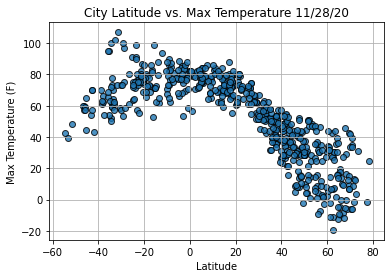

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

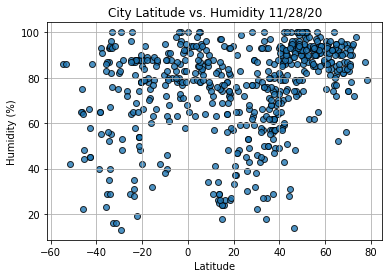

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

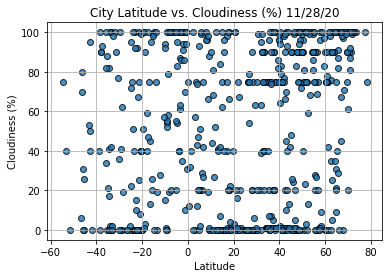

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

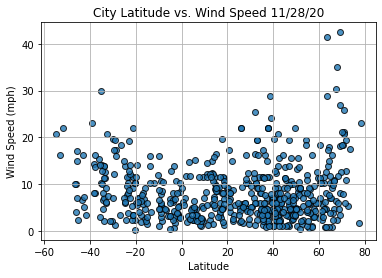

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a Linear Regression Function
see random_numbers.ipynb to see the base template this function is based on

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

Remember there will be no output when we run this cell as the function needs to be called with the five parameters before we get a result

# Create the Hemisphere DataFrames
Using the city_data_df DataFrame we will separate out the northern and souther hemisphere data into their own DataFrames

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is 

<b>row = df.loc[row_index].</b>

We will also filter the DataFrame based on a value of a row. To get all Northern Hemisphere latitudes, we want values that are greater or equal to 0. The syntax for getting this is `city_data_df["Lat"] >= 0`, which will return either "True" or "False" for all the rows.

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2020-11-29 03:16:26,26.54,-77.06,74.70,66,79,5.01
1,Pittsburg,US,2020-11-29 03:15:21,38.03,-121.88,52.00,49,0,1.45
2,Ushtobe,KZ,2020-11-29 03:16:26,45.25,77.98,25.48,95,48,11.34
3,Jamestown,US,2020-11-29 03:16:26,42.10,-79.24,35.01,59,1,9.17
4,Bitung,ID,2020-11-29 03:16:27,1.45,125.18,78.80,94,40,6.93


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,Belmonte,BR,2020-11-29 03:16:27,-15.86,-38.88,71.60,88,20,4.70
9,Micheweni,TZ,2020-11-29 03:16:27,-4.97,39.83,79.48,78,83,3.18
10,Fare,PF,2020-11-29 03:16:27,-16.70,-151.02,82.76,71,13,5.73
12,Castro,BR,2020-11-29 03:16:27,-24.79,-50.01,63.59,96,95,5.95
15,Daru,PG,2020-11-29 03:16:28,-9.08,143.21,86.11,63,54,7.85


# Linear Regressions on Max Temp for the Northern Hemisphere

Call on the linear regresson function we created earlier, setting x values to latitude and y to Max Temp

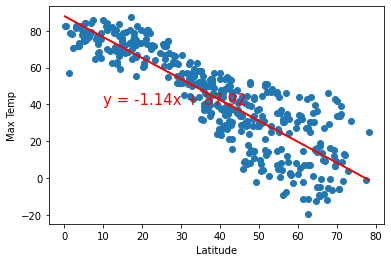

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

The equation is embedded in the data and hard to see. We can change the position of the equation in the `text_coordinates` parameter of our function, which is connected to the plt.annotate method

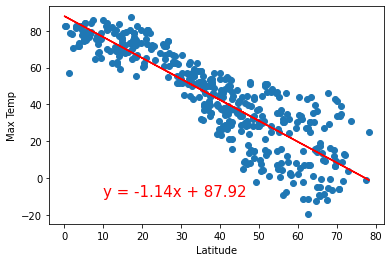

In [23]:
# Adjusted Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-10))

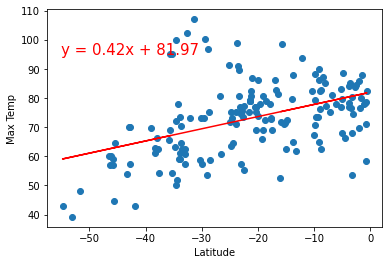

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,95))

Findings 
- The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots

In [25]:
# check for r-values for Max Temperature southern
(slope,intercept,r_value,p_value,std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(r_value)

0.4469596455927302


In [26]:
# check for r-values for Max Temperature northern
(slope,intercept,r_value,p_value,std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(r_value)

-0.8687572247782265


# Perform Linear Regressions on % Humidity for the Northern Hemisphere

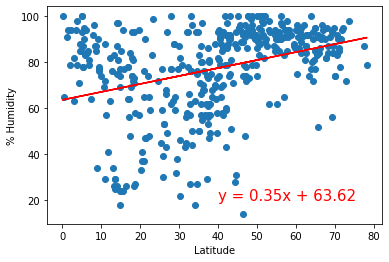

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

# Perform Linear Regressions on % Humidity for the Northern Hemisphere

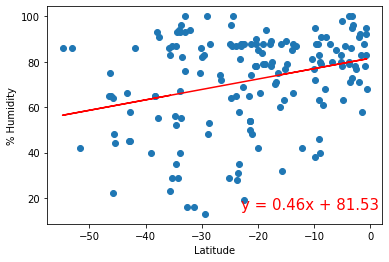

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,15))

Findings 
- The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

In [29]:
# check for r-values for Humidity southern
(slope,intercept,r_value,p_value,std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(r_value)

0.295538299846355


In [30]:
# check for r-values for Humidity northern
(slope,intercept,r_value,p_value,std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(r_value)

0.3428386175700348


# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

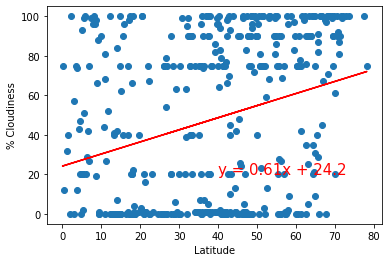

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,20))

# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

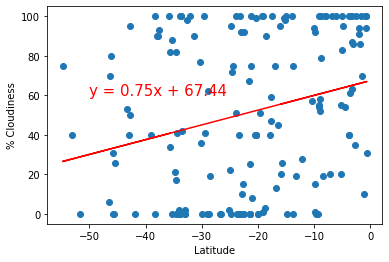

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

Findings
- The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

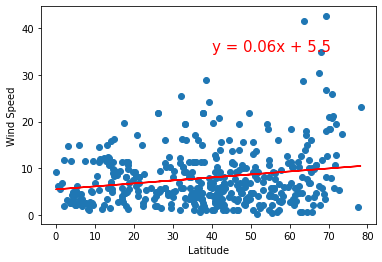

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

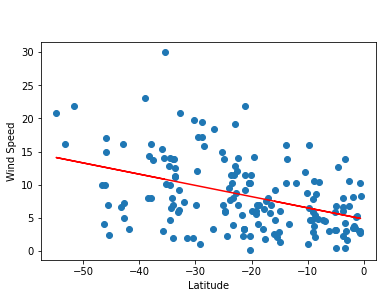

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

Finding
- The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 